In [1]:
try:
  print("Dependencies are already installed. Skipping...")
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile
except:
  print("Installing Corresponing Dependencies")
  ! pip install qiskit
  ! pip install pylatexenc
  from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
  from qiskit.visualization import plot_bloch_multivector, plot_histogram
  from qiskit.providers.aer import QasmSimulator
  from qiskit import execute,Aer
  import math
  from qiskit import transpile

Dependencies are already installed. Skipping...


In [2]:
!rm -r modules

In [3]:
# fetch backend
backend = Aer.get_backend('statevector_simulator')

In [4]:
# import modules
import requests
from pathlib import Path
import os


directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)
  
helper_modules = {
    "quantum_hardware_circuits.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/quantum_hardware_functions/quantum_hardware_circuits.py",
    "experiment_utils.py":"https://raw.githubusercontent.com/Q-b1t/Quantum_Mechanics-Computing_Stuff/master/modules/utils/experiment_utils.py"
    }

for module,raw in helper_modules.items():
  module_file = directory / module
  if(module_file.exists()):
    print(f"Module: {module_file} already exists. Skipping...")
  else:
    print(f"Downloading {module}")
    request = requests.get(raw)
    with open(module_file,"wb") as f:
      f.write(request.content)

In [5]:
from modules.experiment_utils import ideal_qc_simulation

In [6]:
def get_target_measurement(output,target_qubits):
  filtered_output = list()
  for q in target_qubits:
    filtered_output.append(output[q])
  return ''.join(filtered_output)

def initialize_quantum_circuit(qc,target_qubits,hadamard = False):
  for q in target_qubits:
    if hadamard:
      qc.h(q)
    else:
      qc.x(q)

def reverse_output(output):
  rev = [output[q] for q in reversed(range(len(output)))]
  return ''.join(rev)

def make_meaurement(qc,qr,cr,output_qubits):
  for q in output_qubits:
    qc.measure(qr[q],cr[q])

# Quantum Multiplier Circuit Implementation
The implementation consist of a basic achitecture of two times one inputs with a three bit output.

In [7]:
# number of qubits in the circuit
num_qubits = 10

In [8]:
# instance the quantum circuit
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr,cr)

In [9]:
target_qubits = [0,1,2]
initialize_quantum_circuit(qc,target_qubits)

In [10]:
# add the tofoli gates
qc.ccx(qr[0],qr[1],qr[3])
qc.ccx(qr[0],qr[2],qr[7])

In [11]:
from modules.quantum_hardware_circuits import qfa

In [12]:
# create two instanced of a quantum full adder circuit
qfa_1 = qfa()
qfa_2 = qfa()

In [13]:
# add the adders to the circuit in the corresponding position
qc.append(qfa_1,[qr[3],qr[4],qr[5],qr[6]])
qc.append(qfa_2,[qr[7],qr[8],qr[6],qr[9]])

In [14]:
# measure the qubits 
output_qubits = [5,6,9]
for q in output_qubits:
  qc.measure(qr[q],cr[q])

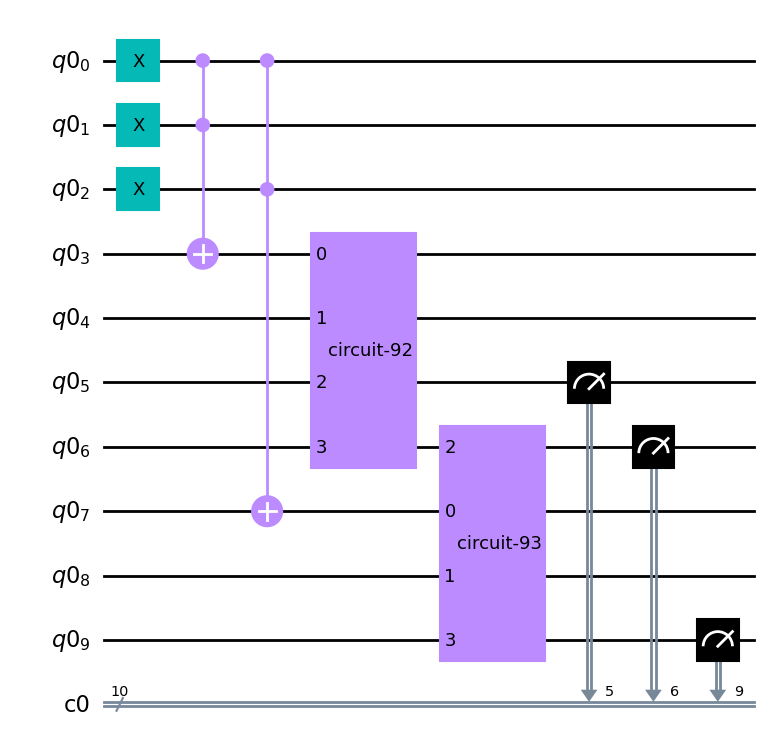

In [15]:
qc.draw("mpl")

In [16]:
# get the mearurements
measurements_counts = ideal_qc_simulation(qc,backend,1)

In [17]:
output = list(measurements_counts.keys())[0]
output

'0001100000'

In [18]:
reversed_output = reverse_output(output)
reversed_output

'0000011000'

In [19]:
filtered_output = get_target_measurement(reversed_output,output_qubits)
filtered_output

'110'